# Price Prediction

In this Python notebook I will demonstrate how to perform all datascience steps in order to better understand and infer the prices of residences in the United States.

First of all, let's read some basic libraries that will help us do the necessary work.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('seaborn-talk')

Now that we have loaded some default python libraries for datascience, let's work upon the dataset analysis. To do this, let's first open the input file into a pandas dataframe named properties.

In [2]:
df_properties = pd.read_csv("properties.csv", sep=',')

Let's verify if the file was correctly loaded by showing up the amount of lines and columns for the file. Then let's verify how this dataset looks like by observing the set of features that compose each individual sample.

In [3]:
print("Lines: %s, columns: %s" % df_properties.shape)
df_properties.head(5)

Lines: 176081, columns: 8


,apn,zip_code,property_type,lot,sqft,beds,baths,price
0,06037-5782020007,91007,residential,20492.0,2991.0,4,2.5,2168000
1,06037-5436013020,90039,residential,6752.0,1533.0,3,2.0,898000
2,06037-2549013007,91040,residential,38757.0,3146.0,4,4.0,998999
3,06059-03318106,92831,residential,6375.0,1364.0,3,1.0,549000
4,06059-93279051,92637,residential,1700.0,1592.0,3,2.0,699999


As we can observe above, this dataset contains over 176 thousand samples. The set of features that describes the dataset are:
* apn: This feature is the property identifier.
* zip_code: This feature refers to the region of a given property.
* property_type: This feature indentifies the kind of property
* lot: This feature is the area of the lot
* sqft: This feature describes the square feet of the residence
* beds: This refers to the amount of beds in the apartment
* baths: This is basically the kinds of bathrooms. This value is the sum of individual bathrooms.
* price: This is the price for each individual apartment.

Now let's try to infer some statistics from this dataset.
As we can observe in the bellow code, the type of the property has three different versions: *residential*, *lease* and *residential income*.

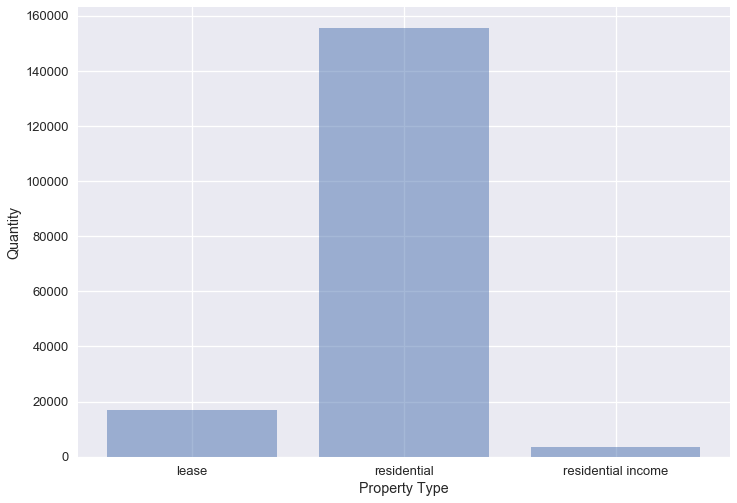

In [49]:
qt_prop_type_value = df_properties.groupby(by='property_type').count()['apn'].values
qt_prop_type_name = df_properties.groupby(by='property_type').count()['apn'].index.values
plt.bar(np.arange(3), qt_prop_type, alpha=0.5)
plt.xlabel("Property Type")
plt.ylabel("Quantity")
a = plt.xticks(np.arange(3), qt_prop_type_name)
plt.tight_layout()

As we can observe, most of the properties in these dataset belong to the residential type with over $155$ thousand properties.

Let's filter this dataset and work only with the set os samples belonging to the residential type. The code to filter these samples is shown bellow:

In [57]:
df_residences = df_properties[df_properties['property_type'] == 'residential']
print("New dataframe with %s lines and %s columns" % df_residences.shape)

New dataframe with 155421 lines and 8 columns


Now that we have filtered out the *residences* from the original dataset, let's verify if there are any samples with missing values:


In [63]:
df_residences.isnull().any('index')

apn              False
zip_code         False
property_type    False
lot              False
sqft             False
beds             False
baths            False
price            False
dtype: bool

As we can verify, there is no missing values in this subset, so we can proceed with the statistical analysis of the data before dive into the construction of the Machine Learning models.

Firstly, let's try to identify if there are more than one residence per area.
The first starting point is to just observe the behavior of the data with a box plot and observe the average amount of residences per area (zip_code). After that, let's build a histogram to identify the distribution of samples per area. Let's gather these insights in the following charts:

In [141]:
res_per_area = df_residences.groupby(by='zip_code', sort=False).count().sort_values(by='apn', ascending=False)

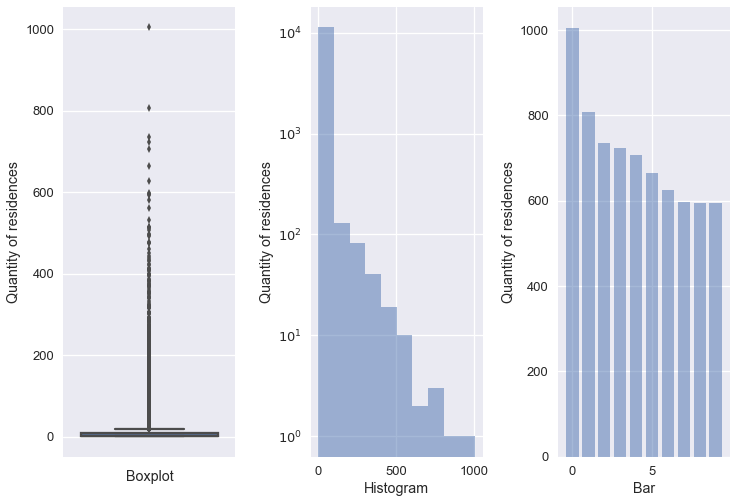

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=3)
sns.boxplot(res_per_area['apn'], ax=ax[0], orient='vertical')
ax[1].hist(res_per_area['apn'], alpha=0.5, log=True)
ax[2].bar(np.arange(10), res_per_area['apn'].values[0:10], alpha=0.5)
ax[0].set_ylabel("Quantity of residences")
ax[1].set_ylabel("Quantity of residences")
ax[2].set_ylabel("Quantity of residences")
ax[0].set_xlabel("Boxplot")
ax[1].set_xlabel("Histogram")
ax[2].set_xlabel("Bar")
plt.tight_layout()

As we can observe above, the boxplot shows that almost the entire dataset has only a few residences per area and we can even consider that the few zip code areas with over 100 residences can be considered outliers under the box plot perspective. This same observation can be corroborated by looking at the histogram above, which shows that most of the areas contains a single residence, and only a few of the zip code areas have over 100 samples (the first peak of the histogram). The last chart shows the amount of residences for the bigger areas.

In [152]:
df_residences.head(3)

,apn,zip_code,property_type,lot,sqft,beds,baths,price
0,06037-5782020007,91007,residential,20492.0,2991.0,4,2.5,2168000
1,06037-5436013020,90039,residential,6752.0,1533.0,3,2.0,898000
2,06037-2549013007,91040,residential,38757.0,3146.0,4,4.0,998999


Let's try to understand the behavior for the remaining variables. Let's start by observing the feature beds:

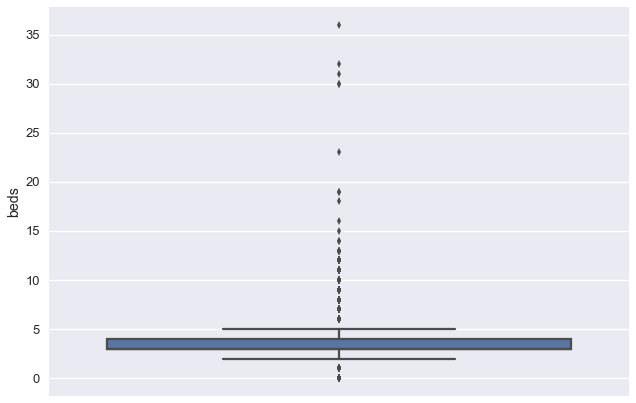

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.boxplot(df_residences['beds'], ax=ax, orient='vertical')

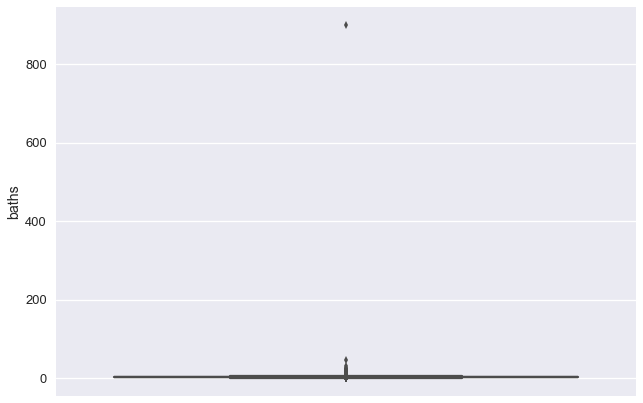

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.boxplot(df_residences['baths'], ax=ax, orient='vertical')

In [169]:
df_residences.query("baths > 100")

,apn,zip_code,property_type,lot,sqft,beds,baths,price
11763,12111-240880101320001,34947,residential,0.0,2004.0,0,900.0,69900
